# Exercise 4 

In [11]:
import math
import numpy as np
import pandas as pd
from typing import Callable
from matplotlib import pyplot as plt

In [12]:
### Generate dataset for specific dimension
def generate_data(d = 5, n=100):

    #create empty data frame
    df = pd.DataFrame()
    # 100 element array with uniform distribution between [0, 1]
    input_feature = np.random.uniform(size=[100, d])

    df = pd.DataFrame(input_feature, columns=[f'feature_{x}' for x in range(d)])
    return df

In [13]:
### Calculate lp norm distance between two points
def lp_norm(p, v1, v2):
    sumOfFeatures = 0
    for i in range(0, len(v1)):
        sumOfFeatures += abs((v2[i] - v1[i])) ** p
    l2_value = sumOfFeatures ** (1 / p)
    return l2_value


In [14]:
# # calculating l2_value for changeable amount of features
# def l2_norm(v1,v2):
#     sumOfFeatures = 0
#     for i in range(0, len(v1)):
#         sumOfFeatures += (v2[i]-v1[i])**2
#     l2_value = math.sqrt(sumOfFeatures)
#     return l2_value

In [15]:
### Calculate contrast value
def contrastValue(dMax,dMin):
    return (dMax -dMin)/ dMin

In [16]:
def get_values(dim: int, n: int, generator: Callable, p_value: int):
    """Generate samples and compute statistics

    Args:
        dim (int): Number of dimensions/features
        n (int): Number of samples
        generator (Callable): Function that generates the samples
        p_value (int): p value of lp-norm, e.g. 2 is used for l2-norm
    """
    points = generator(dim, n).to_numpy()
    min_sum = 0
    max_sum = 0
    avg_sum = 0
    diff_sum = 0
    cont_sum = 0
    for i, p1 in enumerate(points):
        distances = []
        for j, p2 in enumerate(points):
            if i == j:
                continue
            # TODO: substitute l2-norm to lp-norm
            distances.append(lp_norm(p_value, p1, p2))
        minimum = np.min(distances)
        maximum = np.max(distances)
        min_sum += minimum
        max_sum += maximum
        avg_sum += np.mean(distances)
        diff_sum += maximum - minimum
        cont_sum += contrastValue(maximum, minimum)
    avg_min = min_sum/n
    avg_max = max_sum/n
    avg_avg = avg_sum/n
    avg_diff = diff_sum/n
    avg_cont = cont_sum/n
    return pd.DataFrame([[avg_min, avg_max, avg_avg, avg_diff, avg_cont]], columns=['min', 'max', 'avg', 'diff', 'cont'])

print(get_values(3, 100, generate_data, 2))

        min      max       avg      diff      cont
0  0.136408  1.13722  0.641001  1.000812  9.017193


In [17]:
# set dimensions
dims = [1,2,3,4,5,10,20,30,40,50,60,70,80,90,100]

In [18]:
# set distance measures
p_values = [0.5, 1, 2, 3]

             min          max          avg         diff
dim                                                    
1       0.004862     0.755707     0.345670     0.750844
2       0.112981     2.852813     1.256810     2.739831
3       0.521766     5.820224     2.749001     5.298458
4       1.153711     9.507154     4.804680     8.353443
5       2.198329    14.229388     7.347029    12.031059
10     12.965172    47.095470    28.496287    34.130298
20     68.814118   168.011109   114.802399    99.196992
30    168.584525   354.876775   257.830011   186.292250
40    322.258781   611.542072   459.621146   289.283290
50    514.960000   914.375338   713.333886   399.415338
60    770.195087  1283.295439  1017.889412   513.100352
70   1074.562669  1746.389669  1388.300368   671.827000
80   1444.561568  2261.003706  1824.140925   816.442138
90   1832.449725  2821.731927  2310.859857   989.282202
100  2292.679519  3425.951057  2848.270150  1133.271538


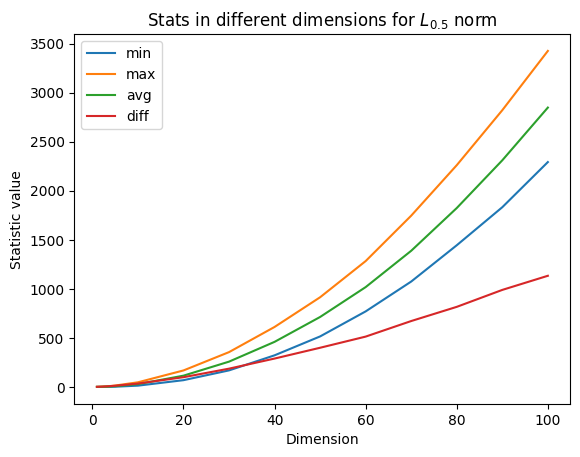

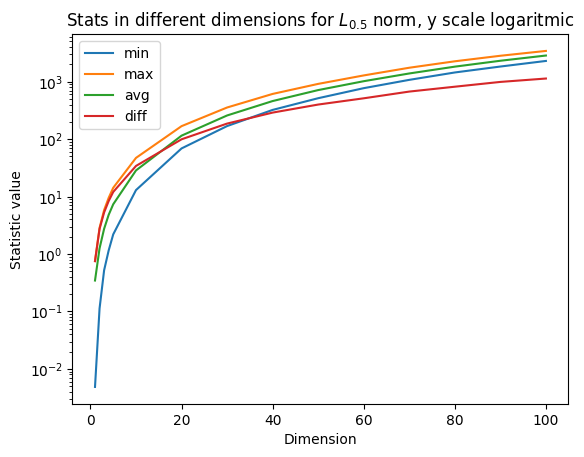

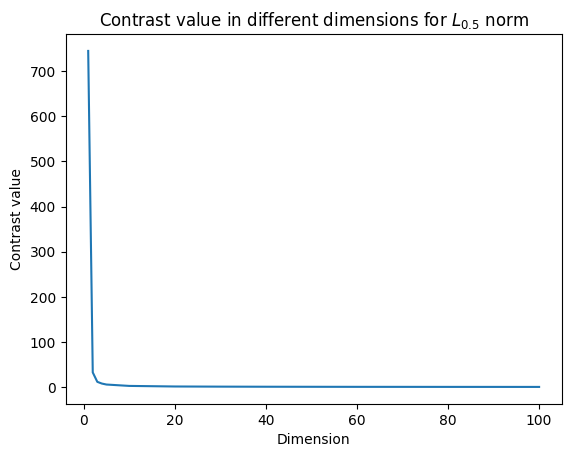

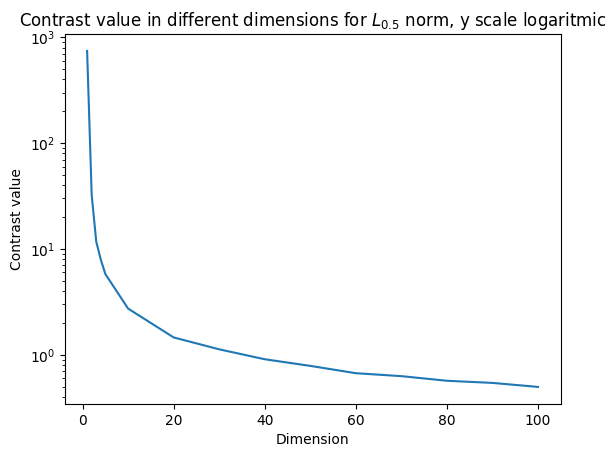

           min        max        avg       diff
dim                                            
1     0.005270   0.753196   0.337989   0.747926
2     0.064546   1.423997   0.652361   1.359451
3     0.181443   1.927936   0.998674   1.746493
4     0.352912   2.431658   1.366363   2.078746
5     0.538333   2.913351   1.677156   2.375017
10    1.642043   5.131758   3.376321   3.489715
20    4.259226   8.895318   6.548678   4.636092
30    6.928818  13.233314  10.055188   6.304496
40    9.662947  16.590923  13.087157   6.927976
50   12.880265  20.981427  16.860214   8.101162
60   15.687017  24.387083  19.876941   8.700066
70   18.569250  28.356770  23.403425   9.787519
80   21.811011  31.558249  26.610106   9.747238
90   24.634064  35.288999  29.992895  10.654935
100  27.768094  38.901403  33.168617  11.133310


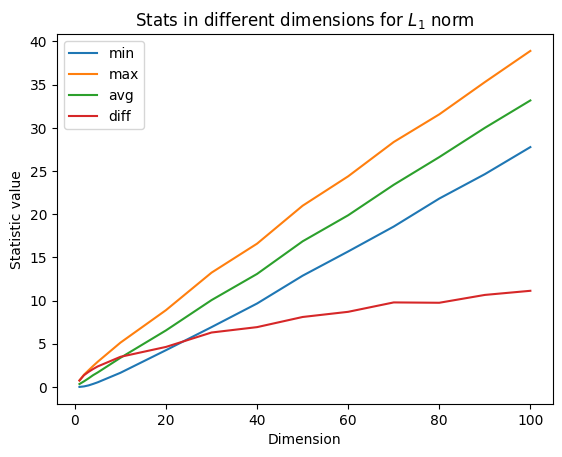

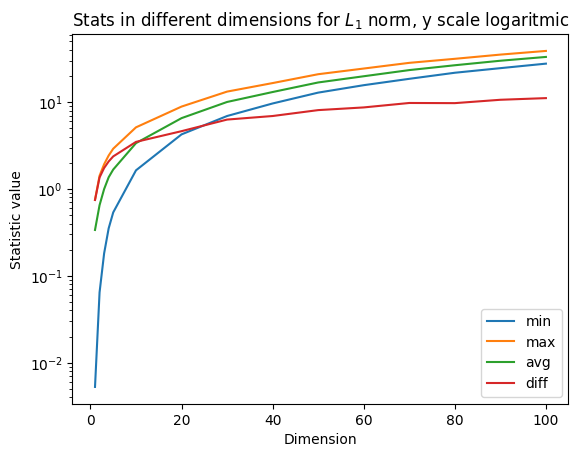

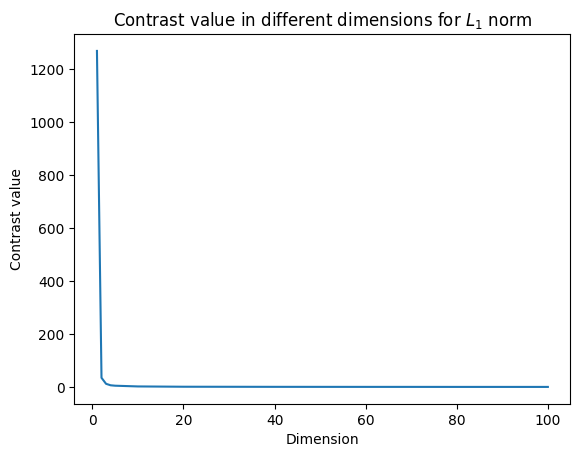

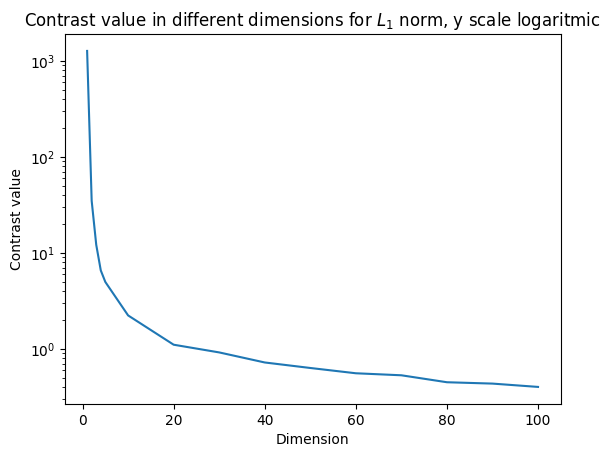

          min       max       avg      diff
dim                                        
1    0.005284  0.747259  0.330168  0.741975
2    0.053678  1.023684  0.534836  0.970006
3    0.132669  1.214139  0.703027  1.081471
4    0.206552  1.283764  0.772260  1.077212
5    0.292664  1.424962  0.904075  1.132298
10   0.684978  1.819217  1.289250  1.134240
20   1.211022  2.342346  1.792103  1.131324
30   1.629612  2.742001  2.222393  1.112390
40   2.006158  3.117316  2.591132  1.111158
50   2.272022  3.409131  2.862667  1.137110
60   2.590324  3.675005  3.146331  1.084681
70   2.832565  3.941020  3.417004  1.108455
80   3.072029  4.220465  3.667969  1.148436
90   3.296063  4.407437  3.867651  1.111374
100  3.534684  4.644128  4.111488  1.109444


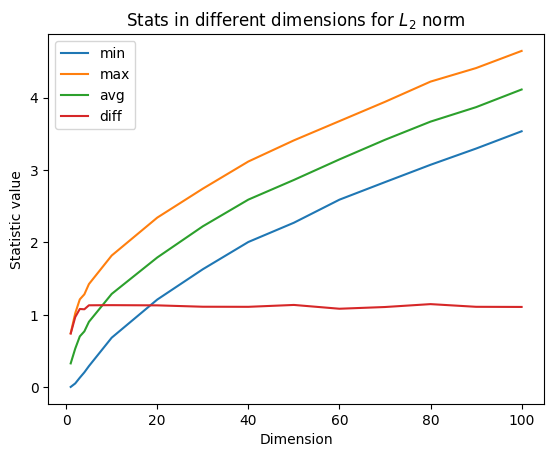

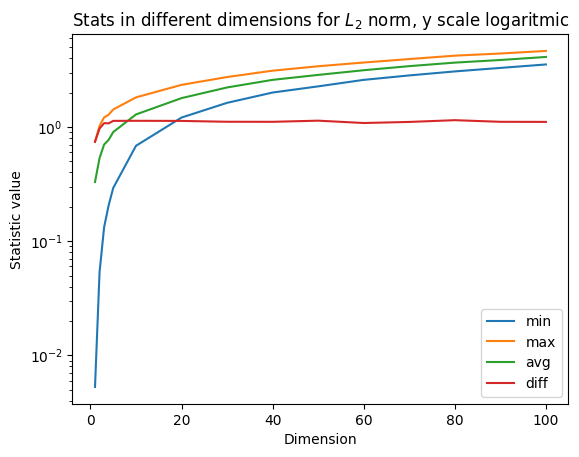

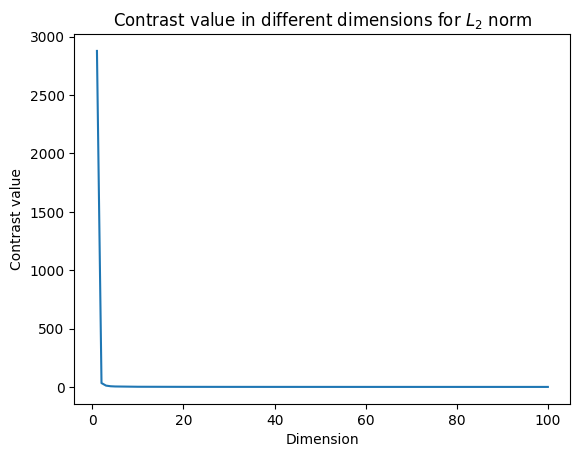

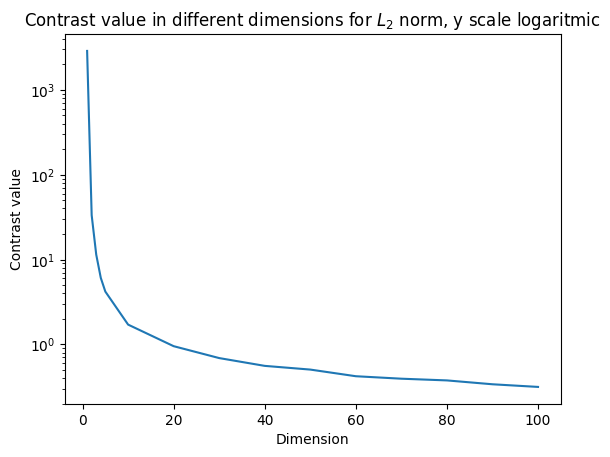

          min       max       avg      diff
dim                                        
1    0.004839  0.741939  0.342949  0.737100
2    0.053673  0.887644  0.470684  0.833971
3    0.120800  1.008038  0.607908  0.887238
4    0.189314  1.092747  0.697206  0.903433
5    0.244159  1.128774  0.755471  0.884615
10   0.525773  1.311198  0.976400  0.785424
20   0.868981  1.568332  1.253808  0.699352
30   1.069110  1.725407  1.433696  0.656296
40   1.230072  1.858174  1.576370  0.628102
50   1.384723  1.972285  1.702845  0.587562
60   1.517161  2.088062  1.819147  0.570900
70   1.584239  2.148653  1.889158  0.564414
80   1.706122  2.251698  2.002060  0.545576
90   1.779099  2.325392  2.064355  0.546293
100  1.874557  2.401973  2.154386  0.527415


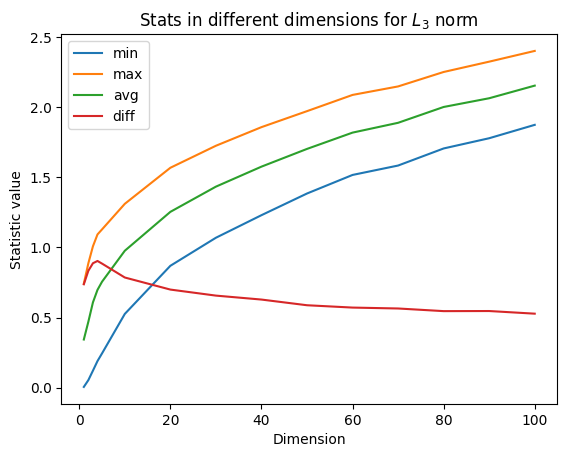

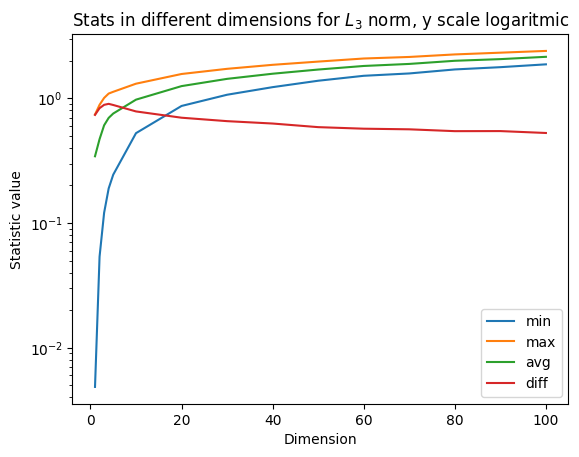

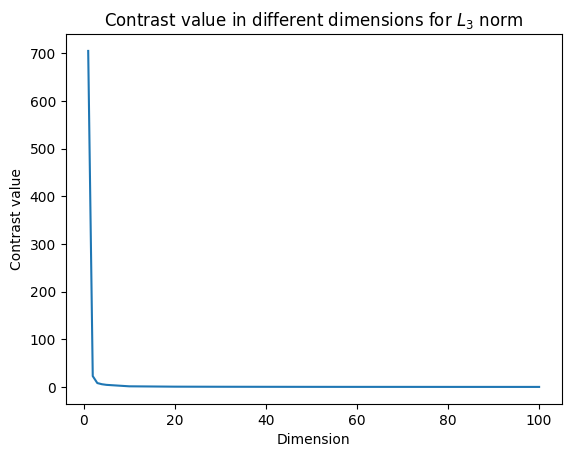

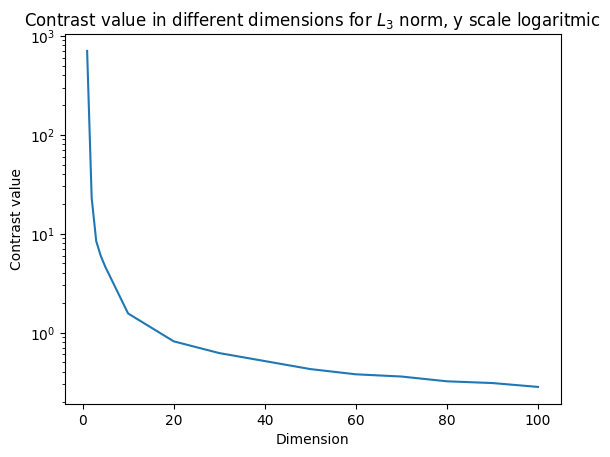

In [19]:
def plot_average_values(data: pd.DataFrame, yscale: str, p_value: int):
    """
    Args:
        data (pd.DataFrame): Input dataframe
        yscale (str, optional): y-scale value like ["linear", "log"]
    """
    plt.plot(data[["min", "max", "avg", "diff"]])
    if yscale == "log":
        plt.title("Stats in different dimensions for $L_{" + str(p_value) + "}$ norm, y scale logaritmic")
    else:
        plt.title("Stats in different dimensions for $L_{" + str(p_value) + "}$ norm")
    plt.xlabel("Dimension")
    plt.ylabel("Statistic value")
    plt.yscale(yscale)
    plt.legend(["min", "max", "avg", "diff"])
    plt.show()


def plot_contrast_value(data: pd.DataFrame, yscale: str, p_value: int):
    plt.plot(data[["cont"]])
    if yscale == "log":
        plt.title("Contrast value in different dimensions for $L_{" + str(p_value) + "}$ norm, y scale logaritmic")
    else:
        plt.title("Contrast value in different dimensions for $L_{" + str(p_value) + "}$ norm")

    plt.xlabel("Dimension")
    plt.ylabel("Contrast value")
    plt.yscale(yscale)
    plt.show()


# iterate over every measure and every dimension
for p_value in p_values:
    data = pd.DataFrame()
    for dim in dims:
        df = get_values(dim, 100, generate_data, p_value)
        df["dim"] = dim
        data = pd.concat([data, df], sort=False)
    # data = data.reset_index().drop('index', axis=1)
    data = data.set_index("dim")
    print(data[["min", "max", "avg", "diff"]])

    # Plot average values
    plot_average_values(data, "linear", p_value)
    plot_average_values(data, "log", p_value)

    # Plot contrast value
    plot_contrast_value(data, "linear", p_value)
    plot_contrast_value(data, "log", p_value)